# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '4_August'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("classification.parquet")


# Eliminate players who maximum number of gambles is 1
df = df.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)


# Reset index
df.index = np.arange(1, len(df) + 1)


# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 12103
--------------------------------------------------
Number of unique visits in dtf: 19
--------------------------------------------------
Number of unique sessions in dtf: 10
--------------------------------------------------


### Wins in a row

In [ ]:
# # Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per session:')
print(df_s.groupby(['clasification', 'session_time'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [ ]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


### Gender Differences

In [ ]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

### Age Differences

In [7]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

In [8]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
extreme_r      18-24          37
               25-40         665
               41-55        1094
               56-75        1145
               76+            98
high_r         18-24          66
               25-40         940
               41-55         990
               56-75         977
               76+            71
low_r          18-24          93
               25-40        1108
               41-55         959
               56-75         841
               76+            64
minimum_r      18-24         168
               25-40        1268
               41-55         797
               56-75         666
               76+            56
Name: playerkey, dtype: int64
--------------------------------------------------


In [9]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
extreme_r      Gen Z             37
               Millenials       665
               Gen X           1094
               Baby Boomers    1145
               Silent            98
high_r         Gen Z             66
               Millenials       940
               Gen X            990
               Baby Boomers     977
               Silent            71
low_r          Gen Z             93
               Millenials      1108
               Gen X            959
               Baby Boomers     841
               Silent            64
minimum_r      Gen Z            168
               Millenials      1268
               Gen X            797
               Baby Boomers     666
               Silent            56
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24     182
25-40    2248
41-55    1968
56-75    1657
76+       136
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24     182
25-40    1733
41-55    1872
56-75    1972
76+       153
Name: playerkey, dtype: int64


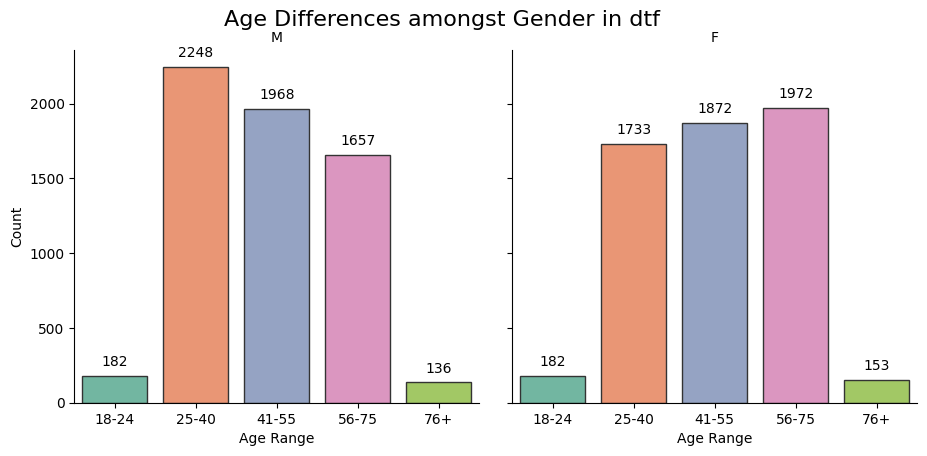

In [10]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [11]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 4525
Count of times each player increase_slotdeno : {94: 1, 113: 4, 184: 7, 198: 6, 224: 6, 227: 1, 381: 1, 424: 2, 429: 1, 433: 1, 460: 21, 575: 17, 646: 2, 668: 56, 745: 3, 865: 1, 996: 4, 1008: 12, 1013: 3, 1029: 1, 1069: 4, 1097: 2, 1136: 3, 1166: 33, 1194: 2, 1200: 2, 1233: 29, 1243: 1, 1263: 1, 1318: 7, 1358: 20, 1371: 4, 1376: 3, 1398: 3, 1402: 3, 1469: 1, 1483: 3, 1553: 2, 1604: 1, 1700: 3, 1701: 1, 1722: 3, 1757: 7, 1764: 1, 1890: 1, 1909: 3, 1932: 1, 1950: 1, 2001: 2, 2046: 1, 2070: 1, 2073: 11, 2097: 20, 2157: 58, 2166: 2, 2197: 1, 2198: 5, 2214: 6, 2236: 3, 2331: 11, 2338: 2, 2341: 6, 2343: 9, 2376: 2, 2479: 2, 2561: 9, 2630: 1, 2710: 2, 2713: 1, 2736: 421, 2806: 6, 2858: 5, 2906: 4, 2959: 10, 2982: 1, 3010: 10, 3058: 1, 3059: 1, 3124: 3, 3127: 11, 3155: 2, 3319: 1, 3359: 9, 3360: 33, 3385: 18, 3586: 1, 3634: 10, 3677: 36, 3708: 3, 3817: 1, 3900: 4, 3955: 3, 4015: 2, 4050: 1, 4190: 4, 4236: 1, 4245: 10, 4265: 6, 4396: 1, 4453: 1, 448

### Wealth Differences
#### General

In [12]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


# Observe all the NaN Values

In [13]:
# Count how many Nan values are in df
print("Number of Nan values in df:", df.isna().sum().sum())

# Print the columns with Nan values
print("Columns with Nan values in df:", df.columns[df.isna().any()].tolist())

Number of Nan values in df: 36787
Columns with Nan values in df: ['profit/bet']


#### Per Visit

In [14]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_v_chunk = pf.transform_ml(data_b=chunk_df, grouping='visit')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_v_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_v = pd.concat(results)

# Now 'df_ML_v' contains the results from all chunks combined into a single DataFrame

Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [15]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  12103
Number of discrepancies: 350
Number of unique players w/o discrepancies:  11753


In [16]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_ALL.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [17]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [19]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df_s[i:i + chunk_size] for i in range(0, df_s.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_s_chunk = pf.transform_ml(data_b=chunk_df, grouping='session_time')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_s_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_s = pd.concat(results)


Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [ ]:
# df_ML_s = pf.transform_ml(data_b=df_s, grouping='session_time')

In [21]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  12103
Number of discrepancies: 346
Number of unique players w/o discrepancies:  11757


In [22]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_ALL.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
       'unique_machines', 'ave_time_